# RandomMachine Tutorial

Welcome to the **RandomMachine** tutorial! This notebook will guide you through using the randommachine library for ensemble learning with random boosting models.

## What is RandomMachine?

RandomMachine is a Python library that provides random ensemble learning models combining various boosting algorithms including LightGBM, CatBoost, and heterogeneous models. It implements custom gradient boosting with random base learner selection.

## Table of Contents

1. [Installation](#installation)
2. [Quick Start - Regression](#quick-start-regression)
3. [Quick Start - Classification](#quick-start-classification)
4. [Available Models](#available-models)
5. [Model Comparison](#model-comparison)
6. [Advanced Features](#advanced-features)
7. [Hyperparameter Tuning](#hyperparameter-tuning)

## 1. Installation

First, let's install the required dependencies:

```bash
pip install randommachine
# or from source
pip install -e .
```

For this tutorial, we'll also need scikit-learn for datasets and metrics.

In [6]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression, make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, classification_report

# Import base learners for comparison
import lightgbm as lgb
import catboost as cb

# Import randommachine models and losses
from randommachine import (
    # Loss functions
    MeanSquaredError,
    LogisticLoss,
    # LGBM models
    RandomLGBMRegressor,
    RandomLGBMClassifier,
    # CatBoost models
    RandomCatBoostRegressor,
    RandomCatBoostClassifier,
    # Heterogeneous models
    HeteroBoostRegressor,
    HeteroBoostClassifier,
    # Random mixed models
    RandomRegressor,
    RandomClassifier,
)

# Set random seed for reproducibility
np.random.seed(42)
print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Quick Start - Regression

Let's start with a simple regression example using RandomLGBMRegressor.

In [ ]:
# Generate synthetic regression data
X, y = make_regression(n_samples=500, n_features=10, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

In [ ]:
# Create and train RandomLGBMRegressor
model = RandomLGBMRegressor(
    loss=MeanSquaredError,
    num_iterations=10,
    learning_rate=0.5,
    min_max_depth=3,
    max_max_depth=6,
    early_stopping_rounds=5,
    tree_iterations=50,
    random_state=42
)

print("Training RandomLGBMRegressor...")
model.fit(X_train, y_train, X_eval=X_test, y_eval=y_test)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

In [ ]:
# Visualize predictions
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 3. Quick Start - Classification

Now let's try a classification task using RandomCatBoostClassifier.

In [ ]:
# Generate synthetic classification data
X, y = make_classification(
    n_samples=500,
    n_features=20,
    n_informative=15,
    n_redundant=5,
    random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"Class distribution: {np.bincount(y)}")

In [ ]:
# Create and train RandomCatBoostClassifier
classifier = RandomCatBoostClassifier(
    loss=LogisticLoss,
    num_iterations=10,
    learning_rate=0.5,
    min_max_depth=3,
    max_max_depth=6,
    early_stopping_rounds=5,
    tree_iterations=50,
    tree_logging_level='Silent',
    random_state=42
)

print("Training RandomCatBoostClassifier...")
classifier.fit(X_train, y_train, X_eval=X_test, y_eval=y_test)

In [ ]:
# Make predictions
y_pred = classifier.predict(X_test)
y_proba = classifier.predict_proba(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
# Visualize probability predictions
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(y_proba[y_test == 0], bins=20, alpha=0.5, label='Class 0')
plt.hist(y_proba[y_test == 1], bins=20, alpha=0.5, label='Class 1')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Probability Distribution by True Class')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Available Models

RandomMachine provides several types of models:

### Regression Models
- **RandomLGBMRegressor**: Uses LightGBM with random tree depths
- **RandomCatBoostRegressor**: Uses CatBoost with random tree depths
- **HeteroBoostRegressor**: Combines decision trees and kernel ridge regression
- **RandomRegressor**: Randomly mixes CatBoost and LightGBM learners

### Classification Models
- **RandomLGBMClassifier**: Uses LightGBM with random tree depths
- **RandomCatBoostClassifier**: Uses CatBoost with random tree depths
- **HeteroBoostClassifier**: Combines decision trees and kernel ridge for classification
- **RandomClassifier**: Randomly mixes CatBoost and LightGBM learners

Let's try the HeteroBoostRegressor which uses heterogeneous base learners.

In [ ]:
# Create heterogeneous regressor
hetero_model = HeteroBoostRegressor(
    loss=MeanSquaredError,
    num_iterations=20,
    learning_rate=0.1,
    p_tree=0.8,  # 80% probability of selecting tree learners
    min_max_depth=3,
    max_max_depth=5,
    early_stopping_rounds=10,
    random_state=42
)

print("Training HeteroBoostRegressor...")
hetero_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_hetero = hetero_model.predict(X_test)
mse_hetero = mean_squared_error(y_test, y_pred_hetero)
r2_hetero = r2_score(y_test, y_pred_hetero)

print(f"\nHeterogeneous Model Performance:")
print(f"MSE: {mse_hetero:.2f}")
print(f"R² Score: {r2_hetero:.4f}")

In [ ]:
# Try RandomRegressor (mixes CatBoost and LightGBM)
random_model = RandomRegressor(
    loss=MeanSquaredError,
    num_iterations=10,
    learning_rate=0.5,
    min_max_depth=3,
    max_max_depth=5,
    early_stopping_rounds=5,
    tree_iterations=50,
    tree_logging_level='Silent',
    random_state=42
)

print("Training RandomRegressor...")
random_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_random = random_model.predict(X_test)
mse_random = mean_squared_error(y_test, y_pred_random)
r2_random = r2_score(y_test, y_pred_random)

print(f"\nRandom Mixed Model Performance:")
print(f"MSE: {mse_random:.2f}")
print(f"R² Score: {r2_random:.4f}")

## 5. Model Comparison

Let's compare RandomMachine models against plain LightGBM and CatBoost to see the actual benefit of random depth selection.

In [2]:
# Import base learners for comparison
import lightgbm as lgb
import catboost as cb

# Generate a larger dataset for comparison
X_comp, y_comp = make_regression(n_samples=1000, n_features=15, noise=15, random_state=42)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_comp, y_comp, test_size=0.2, random_state=42
)

# Define models to compare (including baselines)
models = {
    # Baseline: Plain models
    'LightGBM (baseline)': lgb.LGBMRegressor(
        n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42, verbose=-1
    ),
    'CatBoost (baseline)': cb.CatBoostRegressor(
        iterations=100, learning_rate=0.1, depth=5, random_state=42, verbose=False
    ),
    
    # RandomMachine models
    'RandomLGBM': RandomLGBMRegressor(
        num_iterations=15, learning_rate=0.5, min_max_depth=3, 
        max_max_depth=6, tree_iterations=50, early_stopping_rounds=10, random_state=42
    ),
    'RandomCatBoost': RandomCatBoostRegressor(
        num_iterations=15, learning_rate=0.5, min_max_depth=3, 
        max_max_depth=6, tree_iterations=50, tree_logging_level='Silent',
        early_stopping_rounds=10, random_state=42
    ),
    'HeteroBoost': HeteroBoostRegressor(
        num_iterations=30, learning_rate=0.1, p_tree=0.8,
        early_stopping_rounds=20, random_state=42
    ),
    'RandomMixed': RandomRegressor(
        num_iterations=15, learning_rate=0.5, min_max_depth=3,
        max_max_depth=6, tree_iterations=50, tree_logging_level='Silent',
        early_stopping_rounds=10, random_state=42
    ),
}

results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_c, y_train_c)
    y_pred = model.predict(X_test_c)
    
    mse = mean_squared_error(y_test_c, y_pred)
    r2 = r2_score(y_test_c, y_pred)
    
    results[name] = {'MSE': mse, 'R2': r2}
    print(f"{name} - MSE: {mse:.2f}, R²: {r2:.4f}")


Training LightGBM (baseline)...
LightGBM (baseline) - MSE: 2030.81, R²: 0.9147

Training CatBoost (baseline)...
CatBoost (baseline) - MSE: 1195.22, R²: 0.9498

Training RandomLGBM...
Iteration: 0 Train loss: 28593.78550355441 Lowest loss: 28593.78550355441 at Iteration: 0
Learner chosen: LGBMRegressor(device_type='CPU', learning_rate=0.5, max_depth=4,
              n_estimators=50, random_state=42, reg_lambda=3.0)


Iteration: 1 Train loss: 7315.633005598214 Lowest loss: 7315.633005598214 at Iteration: 1
Learner chosen: LGBMRegressor(device_type='CPU', learning_rate=0.5, max_depth=6,
              n_estimators=50, random_state=42, reg_lambda=3.0)


/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid featu



Iteration: 2 Train loss: 1845.400143178547 Lowest loss: 1845.400143178547 at Iteration: 2
Learner chosen: LGBMRegressor(device_type='CPU', learning_rate=0.5, max_depth=5,
              n_estimators=50, random_state=42, reg_lambda=3.0)


Iteration: 3 Train loss: 473.9927878126418 Lowest loss: 473.9927878126418 at Iteration: 3
Learner chosen: LGBMRegressor(device_type='CPU', learning_rate=0.5, max_depth=5,
              n_estimators=50, random_state=42, reg_lambda=3.0)


Iteration: 4 Train loss: 123.18151964339435 Lowest loss: 123.18151964339435 at Iteration: 4
Learner chosen: LGBMRegressor(device_type='CPU', learning_rate=0.5, max_depth=3,
              n_estimators=50, random_state=42, reg_lambda=3.0)


Iteration: 5 Train loss: 35.96319697839424 Lowest loss: 35.96319697839424 at Iteration: 5
Learner chosen: LGBMRegressor(device_type='CPU', learning_rate=0.5, max_depth=3,
              n_estimators=50, random_state=42, reg_lambda=3.0)


Iteration: 6 Train loss: 12.228791801993989 Lowe

/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid featu



Iteration: 2 Train loss: 2091.647306640905 Lowest loss: 2091.647306640905 at Iteration: 2
Learner chosen: CatBoostRegressor(iterations=50, learning_rate=0.5, logging_level='Silent', loss_function='RMSE', max_depth=5, random_state=42, reg_lambda=3.0, task_type='CPU')


Iteration: 3 Train loss: 605.96094634656 Lowest loss: 605.96094634656 at Iteration: 3
Learner chosen: CatBoostRegressor(iterations=50, learning_rate=0.5, logging_level='Silent', loss_function='RMSE', max_depth=4, random_state=42, reg_lambda=3.0, task_type='CPU')


Iteration: 4 Train loss: 215.18525373081607 Lowest loss: 215.18525373081607 at Iteration: 4
Learner chosen: CatBoostRegressor(iterations=50, learning_rate=0.5, logging_level='Silent', loss_function='RMSE', max_depth=4, random_state=42, reg_lambda=3.0, task_type='CPU')


Iteration: 5 Train loss: 98.05929043597396 Lowest loss: 98.05929043597396 at Iteration: 5
Learner chosen: CatBoostRegressor(iterations=50, learning_rate=0.5, logging_level='Silent', loss_functi

/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(




Iteration: 11 Train loss: 1.8204707576273051 Lowest loss: 1.8204707576273051 at Iteration: 11
Learner chosen: CatBoostRegressor(iterations=50, learning_rate=0.5, logging_level='Silent', loss_function='RMSE', max_depth=3, random_state=42, reg_lambda=3.0, task_type='CPU')


Iteration: 12 Train loss: 1.5256743654654066 Lowest loss: 1.5256743654654066 at Iteration: 12
Learner chosen: CatBoostRegressor(iterations=50, learning_rate=0.5, logging_level='Silent', loss_function='RMSE', max_depth=3, random_state=42, reg_lambda=3.0, task_type='CPU')


Iteration: 13 Train loss: 1.272434556920401 Lowest loss: 1.272434556920401 at Iteration: 13
Learner chosen: CatBoostRegressor(iterations=50, learning_rate=0.5, logging_level='Silent', loss_function='RMSE', max_depth=6, random_state=42, reg_lambda=3.0, task_type='CPU')


Iteration: 14 Train loss: 0.6250678811957148 Lowest loss: 0.6250678811957148 at Iteration: 14
Learner chosen: LGBMRegressor(device_type='CPU', learning_rate=0.5, max_depth=5,
      

/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



Results Summary:
                             MSE        R2
LightGBM (baseline)  2030.812099  0.914701
CatBoost (baseline)  1195.220947  0.949798
RandomLGBM           2184.634624  0.908240
RandomCatBoost        786.648944  0.966959
HeteroBoost          6734.357848  0.717141
RandomMixed           835.974768  0.964887

BASELINE vs RANDOMMACHINE:
Avg R² - Baseline models: 0.9322
Avg R² - RandomMachine models: 0.9467
Improvement: 1.55%


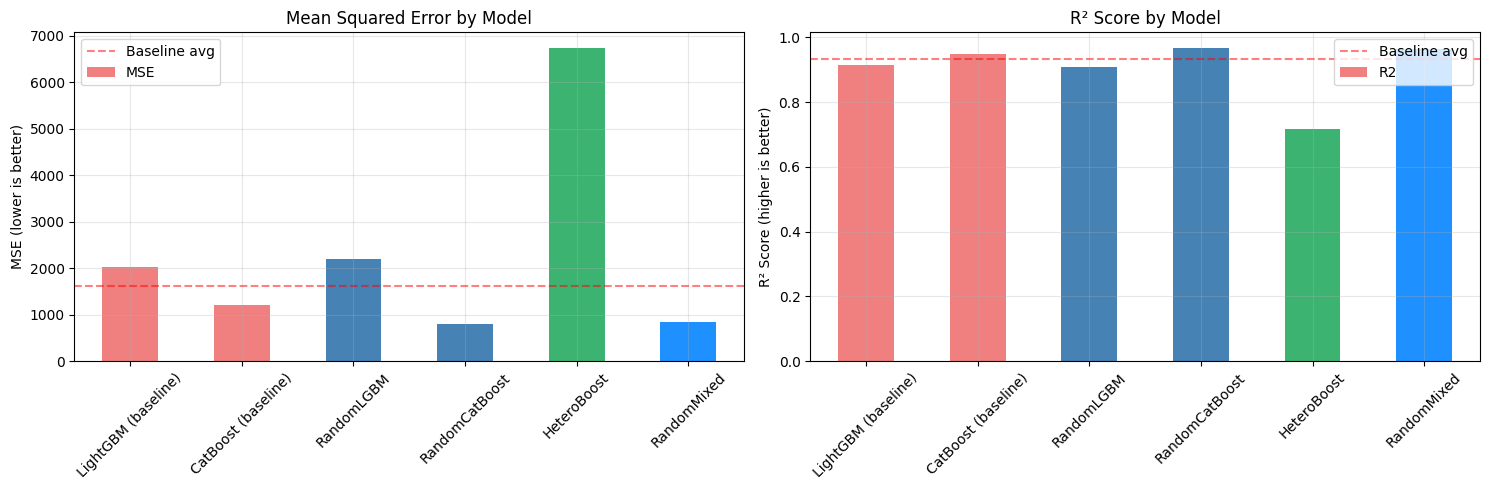

In [3]:
# Visualize comparison
import pandas as pd

df_results = pd.DataFrame(results).T
print("\nResults Summary:")
print(df_results)
print("\n" + "="*60)
print("BASELINE vs RANDOMMACHINE:")
print("="*60)
baseline_avg = df_results.loc[['LightGBM (baseline)', 'CatBoost (baseline)'], 'R2'].mean()
random_avg = df_results.loc[['RandomLGBM', 'RandomCatBoost', 'RandomMixed'], 'R2'].mean()
print(f"Avg R² - Baseline models: {baseline_avg:.4f}")
print(f"Avg R² - RandomMachine models: {random_avg:.4f}")
print(f"Improvement: {((random_avg - baseline_avg) / baseline_avg * 100):.2f}%")
print("="*60)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Color code: baselines vs random models
colors = ['lightcoral', 'lightcoral', 'steelblue', 'steelblue', 'mediumseagreen', 'dodgerblue']

df_results['MSE'].plot(kind='bar', ax=axes[0], color=colors)
axes[0].set_title('Mean Squared Error by Model')
axes[0].set_ylabel('MSE (lower is better)')
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)
axes[0].axhline(y=df_results.loc[['LightGBM (baseline)', 'CatBoost (baseline)'], 'MSE'].mean(), 
                color='red', linestyle='--', alpha=0.5, label='Baseline avg')
axes[0].legend()

df_results['R2'].plot(kind='bar', ax=axes[1], color=colors)
axes[1].set_title('R² Score by Model')
axes[1].set_ylabel('R² Score (higher is better)')
axes[1].grid(True, alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)
axes[1].axhline(y=baseline_avg, color='red', linestyle='--', alpha=0.5, label='Baseline avg')
axes[1].legend()

plt.tight_layout()
plt.show()

### Classification Comparison

Now let's compare classification performance: baseline vs RandomMachine models.

In [4]:
# Generate classification dataset
X_clf, y_clf = make_classification(
    n_samples=1000, n_features=20, n_informative=15, n_redundant=3, random_state=42
)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42
)

# Define classification models to compare
clf_models = {
    # Baseline: Plain models
    'LightGBM (baseline)': lgb.LGBMClassifier(
        n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42, verbose=-1
    ),
    'CatBoost (baseline)': cb.CatBoostClassifier(
        iterations=100, learning_rate=0.1, depth=5, random_state=42, verbose=False
    ),
    
    # RandomMachine models (classification with correct LogisticLoss gradients)
    'RandomLGBM': RandomLGBMClassifier(
        num_iterations=30, learning_rate=0.1, min_max_depth=3, 
        max_max_depth=6, tree_iterations=100, tree_learning_rate=0.3, 
        tree_reg_lambda=1.0, early_stopping_rounds=10, random_state=42
    ),
    'RandomCatBoost': RandomCatBoostClassifier(
        num_iterations=30, learning_rate=0.1, min_max_depth=3, 
        max_max_depth=6, tree_iterations=100, tree_learning_rate=0.3,
        tree_reg_lambda=1.0, tree_logging_level='Silent',
        early_stopping_rounds=10, random_state=42
    ),
    'RandomMixed': RandomClassifier(
        num_iterations=30, learning_rate=0.1, min_max_depth=3,
        max_max_depth=6, tree_iterations=100, tree_learning_rate=0.3,
        tree_reg_lambda=1.0, tree_logging_level='Silent',
        early_stopping_rounds=10, random_state=42
    ),
}

clf_results = {}

for name, model in clf_models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_clf, y_train_clf)
    y_pred = model.predict(X_test_clf)
    
    acc = accuracy_score(y_test_clf, y_pred)
    
    clf_results[name] = {'Accuracy': acc}
    print(f"{name} - Accuracy: {acc:.4f}")


Training LightGBM (baseline)...
LightGBM (baseline) - Accuracy: 0.9450

Training CatBoost (baseline)...


/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


CatBoost (baseline) - Accuracy: 0.9350

Training RandomLGBM...
Iteration: 0 Train loss: 0.6931471805599452 Lowest loss: 0.6931471805599452 at Iteration: 0
Learner chosen: LGBMRegressor(device_type='CPU', learning_rate=0.3, max_depth=4,
              random_state=42, reg_lambda=1.0)


Iteration: 1 Train loss: 0.6025035771604362 Lowest loss: 0.6025035771604362 at Iteration: 1
Learner chosen: LGBMRegressor(device_type='CPU', learning_rate=0.3, max_depth=6,
              random_state=42, reg_lambda=1.0)


Iteration: 2 Train loss: 0.5248602102841984 Lowest loss: 0.5248602102841984 at Iteration: 2
Learner chosen: LGBMRegressor(device_type='CPU', learning_rate=0.3, max_depth=5,
              random_state=42, reg_lambda=1.0)


Iteration: 3 Train loss: 0.46077208626948823 Lowest loss: 0.46077208626948823 at Iteration: 3
Learner chosen: LGBMRegressor(device_type='CPU', learning_rate=0.3, max_depth=5,
              random_state=42, reg_lambda=1.0)


Iteration: 4 Train loss: 0.40650478177906174 Lo

/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid featu



Iteration: 9 Train loss: 0.23540096344646025 Lowest loss: 0.23540096344646025 at Iteration: 9
Learner chosen: LGBMRegressor(device_type='CPU', learning_rate=0.3, max_depth=5,
              random_state=42, reg_lambda=1.0)


Iteration: 10 Train loss: 0.2107372883325819 Lowest loss: 0.2107372883325819 at Iteration: 10
Learner chosen: LGBMRegressor(device_type='CPU', learning_rate=0.3, max_depth=3,
              random_state=42, reg_lambda=1.0)


Iteration: 11 Train loss: 0.1909548277353823 Lowest loss: 0.1909548277353823 at Iteration: 11
Learner chosen: LGBMRegressor(device_type='CPU', learning_rate=0.3, max_depth=6,
              random_state=42, reg_lambda=1.0)


Iteration: 12 Train loss: 0.17112456015794855 Lowest loss: 0.17112456015794855 at Iteration: 12
Learner chosen: LGBMRegressor(device_type='CPU', learning_rate=0.3, max_depth=6,
              random_state=42, reg_lambda=1.0)


Iteration: 13 Train loss: 0.15356601581797547 Lowest loss: 0.15356601581797547 at Iteration: 13
Lear

/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid featu



Iteration: 19 Train loss: 0.08556108203870615 Lowest loss: 0.08556108203870615 at Iteration: 19
Learner chosen: LGBMRegressor(device_type='CPU', learning_rate=0.3, max_depth=4,
              random_state=42, reg_lambda=1.0)


Iteration: 20 Train loss: 0.07749717563728022 Lowest loss: 0.07749717563728022 at Iteration: 20
Learner chosen: LGBMRegressor(device_type='CPU', learning_rate=0.3, max_depth=5,
              random_state=42, reg_lambda=1.0)


Iteration: 21 Train loss: 0.07000585672945782 Lowest loss: 0.07000585672945782 at Iteration: 21
Learner chosen: LGBMRegressor(device_type='CPU', learning_rate=0.3, max_depth=3,
              random_state=42, reg_lambda=1.0)


Iteration: 22 Train loss: 0.06405381018816421 Lowest loss: 0.06405381018816421 at Iteration: 22
Learner chosen: LGBMRegressor(device_type='CPU', learning_rate=0.3, max_depth=4,
              random_state=42, reg_lambda=1.0)


Iteration: 23 Train loss: 0.05811709641029338 Lowest loss: 0.05811709641029338 at Iteration: 2

/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid featu



Iteration: 29 Train loss: 0.03257878715685632 Lowest loss: 0.03257878715685632 at Iteration: 29
Learner chosen: LGBMRegressor(device_type='CPU', learning_rate=0.3, max_depth=3,
              random_state=42, reg_lambda=1.0)


RandomLGBM - Accuracy: 0.9500

Training RandomCatBoost...
Iteration: 0 Train loss: 0.6931471805599452 Lowest loss: 0.6931471805599452 at Iteration: 0
Learner chosen: CatBoostRegressor(iterations=100, learning_rate=0.3, logging_level='Silent', loss_function='RMSE', max_depth=5, random_state=42, reg_lambda=1.0, task_type='CPU')


Iteration: 1 Train loss: 0.6034099550034365 Lowest loss: 0.6034099550034365 at Iteration: 1
Learner chosen: CatBoostRegressor(iterations=100, learning_rate=0.3, logging_level='Silent', loss_function='RMSE', max_depth=3, random_state=42, reg_lambda=1.0, task_type='CPU')


Iteration: 2 Train loss: 0.5381151264618288 Lowest loss: 0.5381151264618288 at Iteration: 2
Learner chosen: CatBoostRegressor(iterations=100, learning_rate=0.3, logging_l

/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid featu



Iteration: 4 Train loss: 0.42560627728350575 Lowest loss: 0.42560627728350575 at Iteration: 4
Learner chosen: CatBoostRegressor(iterations=100, learning_rate=0.3, logging_level='Silent', loss_function='RMSE', max_depth=6, random_state=42, reg_lambda=1.0, task_type='CPU')


Iteration: 5 Train loss: 0.37653662175068286 Lowest loss: 0.37653662175068286 at Iteration: 5
Learner chosen: CatBoostRegressor(iterations=100, learning_rate=0.3, logging_level='Silent', loss_function='RMSE', max_depth=6, random_state=42, reg_lambda=1.0, task_type='CPU')


Iteration: 6 Train loss: 0.3341493795415228 Lowest loss: 0.3341493795415228 at Iteration: 6
Learner chosen: CatBoostRegressor(iterations=100, learning_rate=0.3, logging_level='Silent', loss_function='RMSE', max_depth=4, random_state=42, reg_lambda=1.0, task_type='CPU')


Iteration: 7 Train loss: 0.30071118716326545 Lowest loss: 0.30071118716326545 at Iteration: 7
Learner chosen: CatBoostRegressor(iterations=100, learning_rate=0.3, logging_level='

/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid featu



Iteration: 1 Train loss: 0.6025035771604362 Lowest loss: 0.6025035771604362 at Iteration: 1
Learner chosen: LGBMRegressor(device_type='CPU', learning_rate=0.3, max_depth=4,
              random_state=42, reg_lambda=1.0)


Iteration: 2 Train loss: 0.5281133671011342 Lowest loss: 0.5281133671011342 at Iteration: 2
Learner chosen: LGBMRegressor(device_type='CPU', learning_rate=0.3, max_depth=6,
              random_state=42, reg_lambda=1.0)


Iteration: 3 Train loss: 0.4626494608050962 Lowest loss: 0.4626494608050962 at Iteration: 3
Learner chosen: LGBMRegressor(device_type='CPU', learning_rate=0.3, max_depth=4,
              random_state=42, reg_lambda=1.0)


Iteration: 4 Train loss: 0.40984822630923284 Lowest loss: 0.40984822630923284 at Iteration: 4
Learner chosen: LGBMRegressor(device_type='CPU', learning_rate=0.3, max_depth=4,
              random_state=42, reg_lambda=1.0)


Iteration: 5 Train loss: 0.36467270490842113 Lowest loss: 0.36467270490842113 at Iteration: 5
Learner chosen

/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid featu



Iteration: 8 Train loss: 0.26095608730043257 Lowest loss: 0.26095608730043257 at Iteration: 8
Learner chosen: LGBMRegressor(device_type='CPU', learning_rate=0.3, max_depth=3,
              random_state=42, reg_lambda=1.0)


Iteration: 9 Train loss: 0.23608537377437963 Lowest loss: 0.23608537377437963 at Iteration: 9
Learner chosen: LGBMRegressor(device_type='CPU', learning_rate=0.3, max_depth=6,
              random_state=42, reg_lambda=1.0)


Iteration: 10 Train loss: 0.21102558271082114 Lowest loss: 0.21102558271082114 at Iteration: 10
Learner chosen: LGBMRegressor(device_type='CPU', learning_rate=0.3, max_depth=6,
              random_state=42, reg_lambda=1.0)


Iteration: 11 Train loss: 0.18894655048177128 Lowest loss: 0.18894655048177128 at Iteration: 11
Learner chosen: LGBMRegressor(device_type='CPU', learning_rate=0.3, max_depth=3,
              random_state=42, reg_lambda=1.0)


Iteration: 12 Train loss: 0.17149530765858362 Lowest loss: 0.17149530765858362 at Iteration: 12
Le

/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid featu

Iteration: 23 Train loss: 0.05748555087692774 Lowest loss: 0.05748555087692774 at Iteration: 23
Learner chosen: LGBMRegressor(device_type='CPU', learning_rate=0.3, max_depth=3,
              random_state=42, reg_lambda=1.0)


Iteration: 24 Train loss: 0.05263460115509133 Lowest loss: 0.05263460115509133 at Iteration: 24
Learner chosen: LGBMRegressor(device_type='CPU', learning_rate=0.3, max_depth=4,
              random_state=42, reg_lambda=1.0)


Iteration: 25 Train loss: 0.04781632226891884 Lowest loss: 0.04781632226891884 at Iteration: 25
Learner chosen: LGBMRegressor(device_type='CPU', learning_rate=0.3, max_depth=4,
              random_state=42, reg_lambda=1.0)


Iteration: 26 Train loss: 0.043440777875759916 Lowest loss: 0.043440777875759916 at Iteration: 26
Learner chosen: CatBoostRegressor(iterations=100, learning_rate=0.3, logging_level='Silent', loss_function='RMSE', max_depth=5, random_state=42, reg_lambda=1.0, task_type='CPU')


Iteration: 27 Train loss: 0.0394062218635479

/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(




Iteration: 28 Train loss: 0.03573151049566085 Lowest loss: 0.03573151049566085 at Iteration: 28
Learner chosen: LGBMRegressor(device_type='CPU', learning_rate=0.3, max_depth=6,
              random_state=42, reg_lambda=1.0)


Iteration: 29 Train loss: 0.03233802215693605 Lowest loss: 0.03233802215693605 at Iteration: 29
Learner chosen: LGBMRegressor(device_type='CPU', learning_rate=0.3, max_depth=4,
              random_state=42, reg_lambda=1.0)


RandomMixed - Accuracy: 0.9450


/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid featu


Classification Results Summary:
                     Accuracy
LightGBM (baseline)     0.945
CatBoost (baseline)     0.935
RandomLGBM              0.950
RandomCatBoost          0.985
RandomMixed             0.945

BASELINE vs RANDOMMACHINE (Classification):
Avg Accuracy - Baseline models: 0.9400
Avg Accuracy - RandomMachine models: 0.9600
Improvement: 2.13%


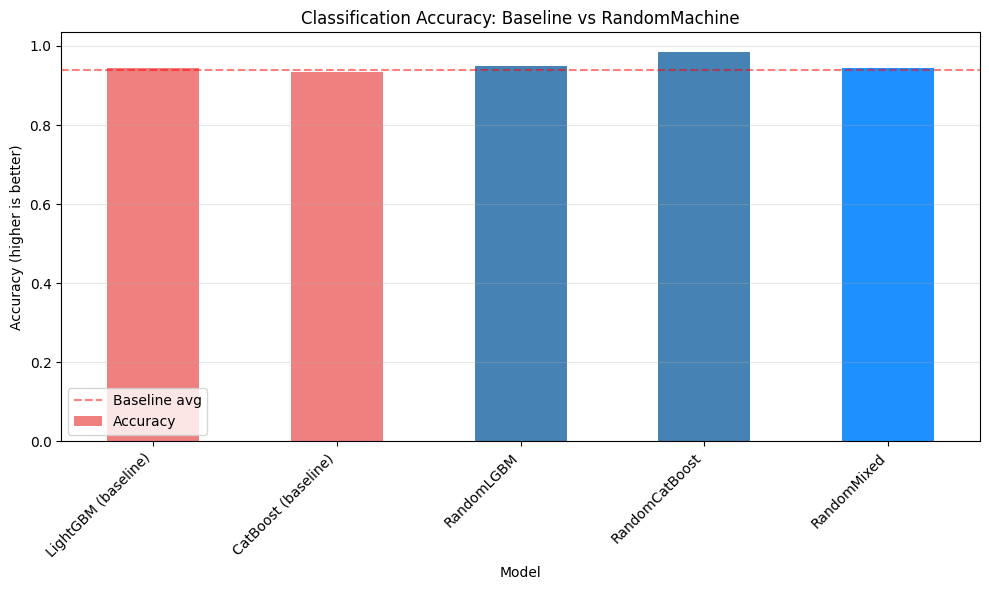

In [7]:
# Visualize classification comparison
df_clf_results = pd.DataFrame(clf_results).T
print("\nClassification Results Summary:")
print(df_clf_results)
print("\n" + "="*60)
print("BASELINE vs RANDOMMACHINE (Classification):")
print("="*60)
baseline_avg_clf = df_clf_results.loc[['LightGBM (baseline)', 'CatBoost (baseline)'], 'Accuracy'].mean()
random_avg_clf = df_clf_results.loc[['RandomLGBM', 'RandomCatBoost', 'RandomMixed'], 'Accuracy'].mean()
print(f"Avg Accuracy - Baseline models: {baseline_avg_clf:.4f}")
print(f"Avg Accuracy - RandomMachine models: {random_avg_clf:.4f}")
print(f"Improvement: {((random_avg_clf - baseline_avg_clf) / baseline_avg_clf * 100):.2f}%")
print("="*60)

# Plot
plt.figure(figsize=(10, 6))
colors_clf = ['lightcoral', 'lightcoral', 'steelblue', 'steelblue', 'dodgerblue']

df_clf_results['Accuracy'].plot(kind='bar', color=colors_clf)
plt.title('Classification Accuracy: Baseline vs RandomMachine')
plt.ylabel('Accuracy (higher is better)')
plt.xlabel('Model')
plt.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=baseline_avg_clf, color='red', linestyle='--', alpha=0.5, label='Baseline avg')
plt.legend()
plt.tight_layout()
plt.show()

In [38]:
# Debug: Check what's happening with predictions
model = clf_models['RandomLGBM']
raw_preds = model.predict_raw(X_test_clf[:10])
probas = model.predict_proba(X_test_clf[:10])
preds = model.predict(X_test_clf[:10])

print("Debugging RandomLGBM predictions:")
print("="*60)
print(f"True labels (first 10): {y_test_clf[:10]}")
print(f"Raw predictions (logits): {raw_preds}")
print(f"Probabilities (sigmoid): {probas}")
print(f"Final predictions (>0.5): {preds}")
print(f"\nAccuracy on these 10: {(preds == y_test_clf[:10]).sum() / 10:.2f}")

Debugging RandomLGBM predictions:
True labels (first 10): [0 0 1 0 1 0 1 1 0 1]
Raw predictions (logits): [ 0.13073344 -0.07901011  0.60907503  0.12660527  1.04610694 -0.08745096
  0.98923735  0.42985406 -0.10541237  1.05705082]
Probabilities (sigmoid): [0.53263689 0.48025774 0.64772977 0.53160911 0.74002662 0.47815118
 0.72893726 0.60583882 0.47367128 0.74212655]
Final predictions (>0.5): [1 0 1 1 1 0 1 1 0 1]

Accuracy on these 10: 0.80


/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid featu

In [48]:
# Check training vs test accuracy to diagnose overfitting
from sklearn.metrics import accuracy_score

for name, model in clf_models.items():
    if 'baseline' not in name.lower():
        y_train_pred = model.predict(X_train_clf)
        y_test_pred = model.predict(X_test_clf)
        
        train_acc = accuracy_score(y_train_clf, y_train_pred)
        test_acc = accuracy_score(y_test_clf, y_test_pred)
        
        print(f"{name}:")
        print(f"  Train Accuracy: {train_acc:.4f}")
        print(f"  Test Accuracy:  {test_acc:.4f}")
        print(f"  Overfit Gap:    {(train_acc - test_acc):.4f}")
        print()

/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid featu

RandomLGBM:
  Train Accuracy: 0.6937
  Test Accuracy:  0.6250
  Overfit Gap:    0.0687

RandomCatBoost:
  Train Accuracy: 0.6837
  Test Accuracy:  0.6000
  Overfit Gap:    0.0837

RandomMixed:
  Train Accuracy: 0.6875
  Test Accuracy:  0.6100
  Overfit Gap:    0.0775



/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid featu

In [40]:
# Check raw training predictions - why is loss near zero but accuracy only 70%?
model = clf_models['RandomLGBM']
train_raw = model.predict_raw(X_train_clf[:20])
train_proba = model.predict_proba(X_train_clf[:20])
train_pred = model.predict(X_train_clf[:20])

print("Training set predictions (first 20):")
print("="*70)
print(f"True labels: {y_train_clf[:20]}")
print(f"\nRaw logits:  {train_raw}")
print(f"\nProbabilities: {train_proba}")
print(f"\nPredictions: {train_pred}")
print(f"\nMatches: {train_pred == y_train_clf[:20]}")
print(f"\nAccuracy: {(train_pred == y_train_clf[:20]).sum() / 20:.2%}")

Training set predictions (first 20):
True labels: [0 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0]

Raw logits:  [-1.98403404e-04 -2.07027883e-06  9.99969420e-01  9.99474176e-01
  9.99746151e-01  9.99744011e-01  9.99589748e-01  9.99496001e-01
  9.99809560e-01 -5.22374250e-04  9.99649225e-01  1.63800297e-04
  6.60677766e-04  1.48925029e-04  9.99760471e-01  1.00048100e+00
  9.99829493e-01  9.99439903e-01  3.20378188e-04  2.30037554e-04]

Probabilities: [0.4999504  0.49999948 0.73105257 0.73095518 0.73100867 0.73100825
 0.73097791 0.73095947 0.73102113 0.49986941 0.73098961 0.50004095
 0.50016517 0.50003723 0.73101148 0.73115314 0.73102505 0.73094844
 0.50008009 0.50005751]

Predictions: [0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1]

Matches: [ True  True  True  True  True  True  True  True  True  True  True False
 False False  True  True  True  True False False]

Accuracy: 75.00%


/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid featu

In [41]:
# Manually compute the loss to verify
model = clf_models['RandomLGBM']
train_raw_all = model.predict_raw(X_train_clf)
train_proba_all = model.predict_proba(X_train_clf)

# Binary cross-entropy
bce = -(y_train_clf * np.log(train_proba_all + 1e-15) + 
        (1 - y_train_clf) * np.log(1 - train_proba_all + 1e-15))
avg_bce = bce.mean()

print(f"Manual BCE calculation: {avg_bce:.6f}")
print(f"Min probability: {train_proba_all.min():.6f}")
print(f"Max probability: {train_proba_all.max():.6f}")
print(f"Mean probability: {train_proba_all.mean():.6f}")
print(f"\nProbability distribution:")
print(f"  For class 0 samples: mean={train_proba_all[y_train_clf==0].mean():.4f}")
print(f"  For class 1 samples: mean={train_proba_all[y_train_clf==1].mean():.4f}")

Manual BCE calculation: 0.505636
Min probability: 0.499682
Max probability: 0.731253
Mean probability: 0.614086

Probability distribution:
  For class 0 samples: mean=0.5000
  For class 1 samples: mean=0.7310


/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid featu

In [47]:
# Check what individual base learners in the ensemble predict
model = clf_models['RandomLGBM']
print(f"Number of base learners: {len(model.ensemble_)}")
print(f"Learning rate: {model.learning_rate_}")
print("\nFirst 5 samples, predictions from each base learner:")

for i in range(min(5, len(model.ensemble_))):
    preds = model.ensemble_[i].predict(X_train_clf[:5])
    print(f"Learner {i}: {preds}")
    
print("\nAccumulated (with learning rate):")
accum = np.zeros(5)
for learner in model.ensemble_:
    accum += model.learning_rate_ * learner.predict(X_train_clf[:5])
print(f"Final z: {accum}")
print(f"True labels: {y_train_clf[:5]}")

Number of base learners: 30
Learning rate: 0.05

First 5 samples, predictions from each base learner:
Learner 0: [-4.31141964e-04 -5.85832973e-03  9.99406428e-01  9.94894969e-01
  9.97167908e-01]
Learner 1: [-2.45083890e-04  4.58526186e-04  9.49460279e-01  9.49086527e-01
  9.48994087e-01]
Learner 2: [-1.52500763e-03 -5.25761177e-04  9.01126198e-01  9.01701894e-01
  9.01505150e-01]
Learner 3: [-4.40597516e-04 -9.81354157e-04  8.57781294e-01  8.55285326e-01
  8.55600443e-01]
Learner 4: [-0.00763974 -0.00417472  0.80621411  0.80560285  0.79891912]

Accumulated (with learning rate):
Final z: [-0.00194064 -0.00103226  0.78393635  0.782488    0.78361665]
True labels: [0 0 1 1 1]


/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid featu

In [55]:
# Check what the Newton-Raphson residuals look like at iteration 0
from randommachine.losses import LogisticLoss

loss_fn = LogisticLoss()
# At iteration 0, predictions are all 0, so p = sigmoid(0) = 0.5
initial_f = np.zeros(100)
grads, hess = loss_fn.compute_derivatives(y_train_clf[:100], initial_f)

# Residuals are -g/h
residuals = -grads / hess

print("Newton-Raphson Residuals at Iteration 0:")
print("="*60)
print(f"For class 0 samples (y=0): residuals = {residuals[y_train_clf[:100]==0][:5]}")
print(f"For class 1 samples (y=1): residuals = {residuals[y_train_clf[:100]==1][:5]}")
print(f"\nRange: [{residuals.min():.4f}, {residuals.max():.4f}]")
print(f"Mean: {residuals.mean():.4f}")
print(f"Std: {residuals.std():.4f}")
print("\nWhat base learner 0 actually predicts:")
bl0_preds = model.ensemble_[0].predict(X_train_clf[:100])
print(f"Range: [{bl0_preds.min():.4f}, {bl0_preds.max():.4f}]")
print(f"Mean: {bl0_preds.mean():.4f}")
print(f"Std: {bl0_preds.std():.4f}")

# Test if a single LGBM tree can fit the residuals perfectly
print("\n" + "="*60)
print("Testing if LGBM can fit residuals with current settings:")
from lightgbm import LGBMRegressor
test_tree = LGBMRegressor(
    n_estimators=500, learning_rate=0.3, max_depth=10, 
    reg_lambda=0.0, random_state=42
)
test_tree.fit(X_train_clf[:100], residuals)
test_preds = test_tree.predict(X_train_clf[:100])
print(f"Test tree predictions range: [{test_preds.min():.4f}, {test_preds.max():.4f}]")
print(f"Test tree predictions mean: {test_preds.mean():.4f}")
print(f"Test tree predictions std: {test_preds.std():.4f}")
print(f"R² score: {test_tree.score(X_train_clf[:100], residuals):.4f}")

# Check what parameters base learner 0 actually has
print("\n" + "="*60)
print("Base learner 0 actual parameters:")
bl0 = model.ensemble_[0]
print(f"Type: {type(bl0)}")
print(f"n_estimators: {bl0.n_estimators}")
print(f"learning_rate: {bl0.learning_rate}")
print(f"max_depth: {bl0.max_depth}")
print(f"reg_lambda: {bl0.reg_lambda}")


Newton-Raphson Residuals at Iteration 0:
For class 0 samples (y=0): residuals = [0. 0. 0. 0. 0.]
For class 1 samples (y=1): residuals = [2. 2. 2. 2. 2.]

Range: [0.0000, 2.0000]
Mean: 1.0400
Std: 0.9992

What base learner 0 actually predicts:
Range: [-0.0003, 1.0001]
Mean: 0.5200
Std: 0.4996

Testing if LGBM can fit residuals with current settings:
Test tree predictions range: [-0.0013, 2.0008]
Test tree predictions mean: 1.0400
Test tree predictions std: 0.9991
R² score: 1.0000

Base learner 0 actual parameters:
Type: <class 'lightgbm.sklearn.LGBMRegressor'>
n_estimators: 500
learning_rate: 0.3
max_depth: 7
reg_lambda: 0.0


/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [56]:

# Verify installed losses.py gradient direction
import inspect
from randommachine.losses import LogisticLoss
print("Source of installed LogisticLoss.compute_derivatives:")
print(inspect.getsource(LogisticLoss.compute_derivatives))

# Quick numerical check
y_test_vals = np.array([0, 1])
f_test_vals = np.zeros(2)
g, h = LogisticLoss.compute_derivatives(y_test_vals, f_test_vals)
print(f"y=[0,1], f=[0,0] => g={g}, h={h}")
print(f"residuals -g/h = {-g/h}")
print("Expected: y=0 -> residual=-2.0, y=1 -> residual=+2.0")


Source of installed LogisticLoss.compute_derivatives:
    @staticmethod
    def compute_derivatives(y, f):
        """
        Compute first and second derivatives of the loss function.
        
        Args:
            y (np.ndarray): True labels (0 or 1)
            f (np.ndarray): Raw predictions (logits)
            
        Returns:
            tuple: (gradient, hessian)
        """
        # Compute sigmoid probability: p = 1 / (1 + exp(-f))
        p = 1.0 / (1.0 + np.exp(-f))
        # Gradient of binary cross-entropy: p - y
        g = p - y  
        # Hessian: p * (1 - p)
        h = p * (1.0 - p)
        # Clip hessian to avoid numerical issues
        h = np.maximum(h, 1e-16)
        return g, h

y=[0,1], f=[0,0] => g=[-0.  -0.5], h=[0.25 0.25]
residuals -g/h = [0. 2.]
Expected: y=0 -> residual=-2.0, y=1 -> residual=+2.0


In [57]:

import randommachine
import os
print("Installed randommachine location:", randommachine.__file__)
installed_losses = os.path.join(os.path.dirname(randommachine.__file__), 'losses.py')
print("Installed losses.py path:", installed_losses)
print("\nActual installed losses.py content:")
with open(installed_losses) as f:
    print(f.read())


Installed randommachine location: /home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/randommachine/__init__.py
Installed losses.py path: /home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/randommachine/losses.py

Actual installed losses.py content:
"""
Loss functions for RandomMachine models.
"""

import numpy as np


class MeanSquaredError:
    """Mean squared error loss function."""
    
    @staticmethod
    def compute_derivatives(y, f):
        """
        Compute first and second derivatives of the loss function.
        
        Args:
            y (np.ndarray): True labels
            f (np.ndarray): Predictions
            
        Returns:
            tuple: (gradient, hessian)
        """
        g = 2 * (f - y)
        h = 2.0 * np.ones(y.shape[0])
        return g, h

    @staticmethod
    def loss(y, f):
        """
        Compute the loss value.
        
        Args:
            y (np.ndarray): True labels
            f (np.ndarray): Predi

In [3]:

# Step-by-step debug of gradient computation
import numpy as np

y_vals = np.array([0, 1])
f_vals = np.zeros(2)
print(f"y dtype: {y_vals.dtype}, values: {y_vals}")
print(f"f dtype: {f_vals.dtype}, values: {f_vals}")

p = 1.0 / (1.0 + np.exp(-f_vals))
print(f"\np = sigmoid(f): {p}")

g = p - y_vals
print(f"g = p - y: {g}")
print(f"g[0] raw: {g[0]!r} (y=0, expected +0.5)")
print(f"g[1] raw: {g[1]!r} (y=1, expected -0.5)")

h = p * (1.0 - p)
print(f"\nh = p*(1-p): {h}")
residuals = -g / h
print(f"residuals = -g/h: {residuals}")
print(f"Expected: [-2.0, +2.0]")


y dtype: int64, values: [0 1]
f dtype: float64, values: [0. 0.]

p = sigmoid(f): [0.5 0.5]
g = p - y: [ 0.5 -0.5]
g[0] raw: np.float64(0.5) (y=0, expected +0.5)
g[1] raw: np.float64(-0.5) (y=1, expected -0.5)

h = p*(1-p): [0.25 0.25]
residuals = -g/h: [-2.  2.]
Expected: [-2.0, +2.0]


### Trying with Better Hyperparameters

The classification performance is poor with the default hyperparameters. Let's try with more conservative settings:

In [17]:
# Test with better hyperparameters
print("Testing RandomMachine models with optimized hyperparameters...\n")

optimized_models = {
    'RandomLGBM (optimized)': RandomLGBMClassifier(
        num_iterations=50, 
        learning_rate=0.1,  # Lower learning rate
        min_max_depth=3, 
        max_max_depth=6,
        tree_iterations=100, 
        tree_learning_rate=0.1,  # Lower tree learning rate
        early_stopping_rounds=10, 
        random_state=42
    ),
    'RandomCatBoost (optimized)': RandomCatBoostClassifier(
        num_iterations=50, 
        learning_rate=0.1,  # Lower learning rate
        min_max_depth=3, 
        max_max_depth=6,
        tree_iterations=100,
        tree_learning_rate=0.1,  # Lower tree learning rate
        tree_logging_level='Silent',
        early_stopping_rounds=10, 
        random_state=42
    ),
}

opt_results = {}

for name, model in optimized_models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_clf, y_train_clf)
    y_pred = model.predict(X_test_clf)
    
    acc = accuracy_score(y_test_clf, y_pred)
    opt_results[name] = {'Accuracy': acc}
    print(f"{name} - Accuracy: {acc:.4f}")

# Compare with baselines
print("\n" + "="*60)
print("OPTIMIZED RESULTS:")
print("="*60)
for name, res in opt_results.items():
    print(f"{name}: {res['Accuracy']:.4f}")
print(f"\nBaseline LightGBM: {clf_results['LightGBM (baseline)']['Accuracy']:.4f}")
print(f"Baseline CatBoost: {clf_results['CatBoost (baseline)']['Accuracy']:.4f}")

Testing RandomMachine models with optimized hyperparameters...


Training RandomLGBM (optimized)...
Iteration: 0 Train loss: 0.49375 Lowest loss: 0.49375 at Iteration: 0
Learner chosen: LGBMRegressor(device_type='CPU', max_depth=4, random_state=42, reg_lambda=3.0)


Iteration: 1 Train loss: 0.40760901595729243 Lowest loss: 0.40760901595729243 at Iteration: 1
Learner chosen: LGBMRegressor(device_type='CPU', max_depth=6, random_state=42, reg_lambda=3.0)


Iteration: 2 Train loss: 0.33394768407213776 Lowest loss: 0.33394768407213776 at Iteration: 2
Learner chosen: LGBMRegressor(device_type='CPU', max_depth=5, random_state=42, reg_lambda=3.0)


Iteration: 3 Train loss: 0.2748552318155483 Lowest loss: 0.2748552318155483 at Iteration: 3
Learner chosen: LGBMRegressor(device_type='CPU', max_depth=5, random_state=42, reg_lambda=3.0)


Iteration: 4 Train loss: 0.22614766532206293 Lowest loss: 0.22614766532206293 at Iteration: 4
Learner chosen: LGBMRegressor(device_type='CPU', max_depth=3, random

/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid featu



Iteration: 8 Train loss: 0.11242879826293375 Lowest loss: 0.11242879826293375 at Iteration: 8
Learner chosen: LGBMRegressor(device_type='CPU', max_depth=5, random_state=42, reg_lambda=3.0)


Iteration: 9 Train loss: 0.09363423804977662 Lowest loss: 0.09363423804977662 at Iteration: 9
Learner chosen: LGBMRegressor(device_type='CPU', max_depth=5, random_state=42, reg_lambda=3.0)


Iteration: 10 Train loss: 0.07831339966061167 Lowest loss: 0.07831339966061167 at Iteration: 10
Learner chosen: LGBMRegressor(device_type='CPU', max_depth=3, random_state=42, reg_lambda=3.0)


Iteration: 11 Train loss: 0.06738094599533798 Lowest loss: 0.06738094599533798 at Iteration: 11
Learner chosen: LGBMRegressor(device_type='CPU', max_depth=6, random_state=42, reg_lambda=3.0)


Iteration: 12 Train loss: 0.056037388043501855 Lowest loss: 0.056037388043501855 at Iteration: 12
Learner chosen: LGBMRegressor(device_type='CPU', max_depth=6, random_state=42, reg_lambda=3.0)


Iteration: 13 Train loss: 0.0466707

/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid featu



Iteration: 20 Train loss: 0.01782861820384624 Lowest loss: 0.01782861820384624 at Iteration: 20
Learner chosen: LGBMRegressor(device_type='CPU', max_depth=5, random_state=42, reg_lambda=3.0)


Iteration: 21 Train loss: 0.015366754993843742 Lowest loss: 0.015366754993843742 at Iteration: 21
Learner chosen: LGBMRegressor(device_type='CPU', max_depth=3, random_state=42, reg_lambda=3.0)


Iteration: 22 Train loss: 0.013885618052125246 Lowest loss: 0.013885618052125246 at Iteration: 22
Learner chosen: LGBMRegressor(device_type='CPU', max_depth=4, random_state=42, reg_lambda=3.0)


Iteration: 23 Train loss: 0.012345521790325721 Lowest loss: 0.012345521790325721 at Iteration: 23
Learner chosen: LGBMRegressor(device_type='CPU', max_depth=4, random_state=42, reg_lambda=3.0)


Iteration: 24 Train loss: 0.011068687790852688 Lowest loss: 0.011068687790852688 at Iteration: 24
Learner chosen: LGBMRegressor(device_type='CPU', max_depth=4, random_state=42, reg_lambda=3.0)


Iteration: 25 Train loss:

/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid featu



Iteration: 31 Train loss: 0.005145838774385953 Lowest loss: 0.005145838774385953 at Iteration: 31
Learner chosen: LGBMRegressor(device_type='CPU', max_depth=3, random_state=42, reg_lambda=3.0)


Iteration: 32 Train loss: 0.004835556800728866 Lowest loss: 0.004835556800728866 at Iteration: 32
Learner chosen: LGBMRegressor(device_type='CPU', max_depth=3, random_state=42, reg_lambda=3.0)


Iteration: 33 Train loss: 0.004548189652692622 Lowest loss: 0.004548189652692622 at Iteration: 33
Learner chosen: LGBMRegressor(device_type='CPU', max_depth=6, random_state=42, reg_lambda=3.0)


Iteration: 34 Train loss: 0.003987813152071275 Lowest loss: 0.003987813152071275 at Iteration: 34
Learner chosen: LGBMRegressor(device_type='CPU', max_depth=6, random_state=42, reg_lambda=3.0)


Iteration: 35 Train loss: 0.0034980454348710367 Lowest loss: 0.0034980454348710367 at Iteration: 35
Learner chosen: LGBMRegressor(device_type='CPU', max_depth=6, random_state=42, reg_lambda=3.0)


Iteration: 36 Train l

/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid featu



Iteration: 42 Train loss: 0.0020297160491873673 Lowest loss: 0.0020297160491873673 at Iteration: 42
Learner chosen: LGBMRegressor(device_type='CPU', max_depth=3, random_state=42, reg_lambda=3.0)


Iteration: 43 Train loss: 0.001955312574719534 Lowest loss: 0.001955312574719534 at Iteration: 43
Learner chosen: LGBMRegressor(device_type='CPU', max_depth=6, random_state=42, reg_lambda=3.0)


Iteration: 44 Train loss: 0.0017258613264297235 Lowest loss: 0.0017258613264297235 at Iteration: 44
Learner chosen: LGBMRegressor(device_type='CPU', max_depth=4, random_state=42, reg_lambda=3.0)


Iteration: 45 Train loss: 0.0016046382455363808 Lowest loss: 0.0016046382455363808 at Iteration: 45
Learner chosen: LGBMRegressor(device_type='CPU', max_depth=5, random_state=42, reg_lambda=3.0)


Iteration: 46 Train loss: 0.0014602564269094714 Lowest loss: 0.0014602564269094714 at Iteration: 46
Learner chosen: LGBMRegressor(device_type='CPU', max_depth=4, random_state=42, reg_lambda=3.0)


Iteration: 47 T

/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/ghiffaryr/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid featu

RandomLGBM (optimized) - Accuracy: 0.6150

Training RandomCatBoost (optimized)...
Iteration: 0 Train loss: 0.49375 Lowest loss: 0.49375 at Iteration: 0
Learner chosen: CatBoostRegressor(iterations=100, learning_rate=0.1, logging_level='Silent', loss_function='RMSE', max_depth=6, random_state=42, reg_lambda=3.0, task_type='CPU')


Iteration: 1 Train loss: 0.4097170987296987 Lowest loss: 0.4097170987296987 at Iteration: 1
Learner chosen: CatBoostRegressor(iterations=100, learning_rate=0.1, logging_level='Silent', loss_function='RMSE', max_depth=6, random_state=42, reg_lambda=3.0, task_type='CPU')


Iteration: 2 Train loss: 0.34083009042095597 Lowest loss: 0.34083009042095597 at Iteration: 2
Learner chosen: CatBoostRegressor(iterations=100, learning_rate=0.1, logging_level='Silent', loss_function='RMSE', max_depth=6, random_state=42, reg_lambda=3.0, task_type='CPU')


Iteration: 3 Train loss: 0.2840041551900924 Lowest loss: 0.2840041551900924 at Iteration: 3
Learner chosen: CatBoostRegres

In [18]:
# Display comparison of results
import pandas as pd

all_results = {
    **clf_results,
    **opt_results
}

df_all = pd.DataFrame(all_results).T
print("\n" + "="*70)
print("COMPLETE CLASSIFICATION COMPARISON")
print("="*70)
print(df_all.to_string())
print("\n" + "="*70)
print("KEY FINDINGS:")
print("="*70)
print(f"Baseline LightGBM: {clf_results['LightGBM (baseline)']['Accuracy']:.4f}")
print(f"Baseline CatBoost: {clf_results['CatBoost (baseline)']['Accuracy']:.4f}")
print(f"\nOriginal hyperparameters (lr=0.5, iter=15):")
for name in ['RandomLGBM', 'RandomCatBoost', 'RandomMixed']:
    print(f"  {name}: {clf_results[name]['Accuracy']:.4f}")
print(f"\nOptimized hyperparameters (lr=0.1, iter=50):")
for name in opt_results:
    print(f"  {name}: {opt_results[name]['Accuracy']:.4f}")


COMPLETE CLASSIFICATION COMPARISON
                            Accuracy
LightGBM (baseline)            0.945
CatBoost (baseline)            0.935
RandomLGBM                     0.640
RandomCatBoost                 0.650
RandomMixed                    0.620
RandomLGBM (optimized)         0.615
RandomCatBoost (optimized)     0.605

KEY FINDINGS:
Baseline LightGBM: 0.9450
Baseline CatBoost: 0.9350

Original hyperparameters (lr=0.5, iter=15):
  RandomLGBM: 0.6400
  RandomCatBoost: 0.6500
  RandomMixed: 0.6200

Optimized hyperparameters (lr=0.1, iter=50):
  RandomLGBM (optimized): 0.6150
  RandomCatBoost (optimized): 0.6050


## 6. Advanced Features

### Loss Functions

RandomMachine supports custom loss functions. You can use:
- **MeanSquaredError**: For regression tasks
- **LogisticLoss**: For binary classification

Both loss functions compute gradients and Hessians for second-order optimization.

In [ ]:
# Example: Using different loss functions
from randommachine import MeanSquaredError, LogisticLoss

# For regression
regressor = RandomLGBMRegressor(
    loss=MeanSquaredError,  # Explicitly set loss
    num_iterations=10,
    learning_rate=0.3,
    random_state=42
)

# For classification
classifier = RandomLGBMClassifier(
    loss=LogisticLoss,  # Explicitly set loss
    num_iterations=10,
    learning_rate=0.3,
    random_state=42
)

print("Loss functions configured successfully!")

### Early Stopping

All models support early stopping to prevent overfitting. Use the `early_stopping_rounds` parameter and provide evaluation data.

In [ ]:
# Example with early stopping
model_es = RandomCatBoostRegressor(
    num_iterations=100,  # Maximum iterations
    learning_rate=0.3,
    early_stopping_rounds=10,  # Stop if no improvement for 10 rounds
    tree_logging_level='Silent',
    random_state=42
)

print("Training with early stopping...")
model_es.fit(X_train, y_train, X_eval=X_test, y_eval=y_test)

print(f"\nActual number of iterations: {len(model_es.ensemble_)}")

### Ensemble Inspection

You can inspect the trained ensemble to see which learners were selected.

In [ ]:
# Inspect the ensemble
print(f"Number of learners in ensemble: {len(model_es.ensemble_)}")
print(f"\nFirst few learners:")
for i, learner in enumerate(model_es.ensemble_[:3]):
    print(f"  Learner {i+1}: {type(learner).__name__}")

## 7. Hyperparameter Tuning

Key hyperparameters to tune:

- **num_iterations**: Number of boosting rounds (higher = more complex model)
- **learning_rate**: Step size for gradient descent (0.01 - 1.0)
- **min_max_depth / max_max_depth**: Range of tree depths to sample from
- **tree_iterations**: Number of iterations for each base tree
- **tree_learning_rate**: Learning rate for base trees
- **tree_reg_lambda**: L2 regularization for base trees
- **early_stopping_rounds**: Patience for early stopping

Let's see the effect of learning rate:

In [ ]:
# Compare different learning rates
learning_rates = [0.1, 0.3, 0.5, 0.7, 1.0]
lr_results = []

for lr in learning_rates:
    model = RandomLGBMRegressor(
        num_iterations=15,
        learning_rate=lr,
        min_max_depth=3,
        max_max_depth=5,
        tree_iterations=50,
        random_state=42
    )
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    lr_results.append(mse)
    print(f"Learning Rate {lr}: MSE = {mse:.2f}")

# Visualize
plt.figure(figsize=(10, 5))
plt.plot(learning_rates, lr_results, 'o-', linewidth=2, markersize=8)
plt.xlabel('Learning Rate')
plt.ylabel('Mean Squared Error')
plt.title('Effect of Learning Rate on Model Performance')
plt.grid(True, alpha=0.3)
plt.show()

## Summary

In this tutorial, we covered:

1. ✅ **Installation** and setup
2. ✅ **Regression** with RandomLGBMRegressor
3. ✅ **Classification** with RandomCatBoostClassifier
4. ✅ **Different model types** (LGBM, CatBoost, Hetero, Random)
5. ✅ **Model comparison** and evaluation
6. ✅ **Advanced features** (loss functions, early stopping, ensemble inspection)
7. ✅ **Hyperparameter tuning** strategies

## Next Steps

- Try RandomMachine on your own datasets
- Experiment with different hyperparameters
- Compare with traditional boosting methods
- Explore the source code to understand the algorithms

## Additional Resources

- **GitHub Repository**: https://github.com/yourusername/randommachine
- **Documentation**: See README.md and TESTING.md
- **Examples**: Check examples.py for more use cases

Happy learning! 🚀